# Predicting House Prices using Machine Learning

In this notebook, we will be going through a machine learning project initiated by Kaggle, with the goal of predicting the sale price of houses.

Since we are trying to predict a number (sale price), this is a **regression problem**

## 1. Problem Definition

For this project, the question we are trying to answer is: 

> Given the characteristics of previous examples of similar houses that have been sold, how well can we predict the future sale price of a house?

## 2. Data

The data can be found in this link 'https://www.kaggle.com/competitions/neolen-house-price-prediction/data'

Looking at the dataset from Kaggle, there are 2 different datasets:
    1. train.csv - the training set
    2. test.csv - the test set

## 3. Evaluation

For this problem, Kaggle has set the evaluation metric to be Root Mean Squared Error (RMSE). As with other regression evaluations, the goal is to get the RSME of our machine learning model to be as low as possible.

## 4. Features

Features are different parts of the data. During this step, you would want to start finding out what you can about the data.

One way to do this is to create a **data dictionary**.

For this dataset, Kaggle has provided a data dictionary that contains information about the different features of the data.
   
### Data Dictionary

Kaggle has also provided a data dictionary for us to refer to when viewing the features of the data. The following features will be used to predict our target variable (Sale Price of the house).

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:/Users/anglp/desktop/house_prices_project/data/train.csv')
test = pd.read_csv('C:/Users/anglp/desktop/house_prices_project/data/test.csv')
data = pd.concat([train, test], ignore_index=True, sort=False)
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Making a new copy of the original DataFrame

Since we will be manipulating the data, we will make a copy of the original dataframe and perform our changes there.

We will keep the original dataframe intact should we need it again.

In [4]:
df_temp = data.copy()

In [5]:
df_temp.drop('Id', axis=1, inplace=True)

In [6]:
df_temp.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60,20,20,20,45,20,90,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85,NaN,91,NaN,51,NaN,72,66,70
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924,12968,10652,10920,6120,11241,10791,13695,7560
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,2,7,9,8,5,7,3,10,6,5
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,2008,2006,2008,2007,2008,2007,2010,2006,2008,2009
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,New,WD,New,WD,WD,WD,WD,WD,COD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,Normal,Partial,Normal,Partial,Normal,Normal,Normal,Normal,Normal,Abnorml


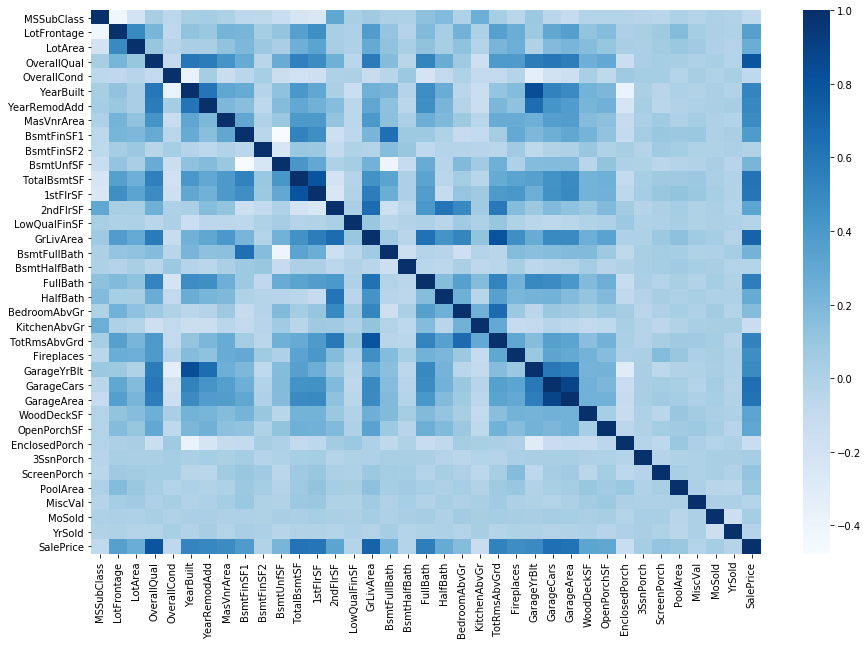

In [7]:
# Checking the correlation of all the features against each other
df_corr = df_temp.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap='Blues')
plt.show()

In [8]:
# Finding and sorting the features that have at least 0.5 correlation value to SalePrice
df_corr[abs(df_corr['SalePrice'].values) >= 0.5]['SalePrice'].sort_values(ascending=False)[1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [9]:
df_temp['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

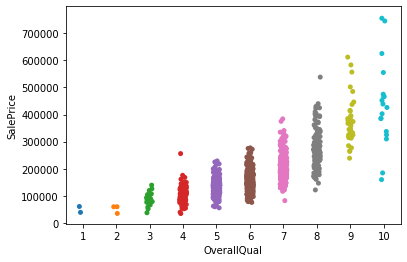

In [10]:
# Seeing the relationship between OverallQual and SalePrice.
sns.stripplot(df_temp['OverallQual'], df_temp['SalePrice'], size=5);

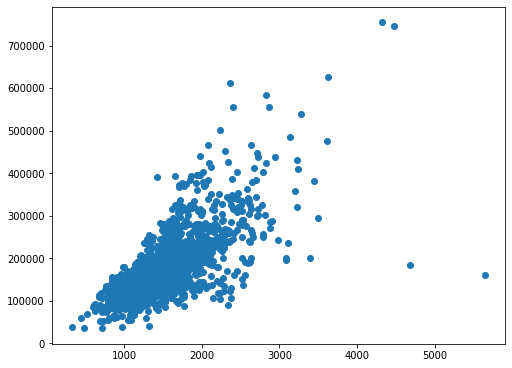

In [11]:
# Seeing the relationship between GrLivArea and SalePrice
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.scatter(df_temp['GrLivArea'], df_temp['SalePrice']);

In [12]:
# Removing the 2 outliers in the data
df_temp.drop(df_temp[(df_temp['GrLivArea']>4000) & (df_temp['SalePrice']<300000)].index, inplace=True)

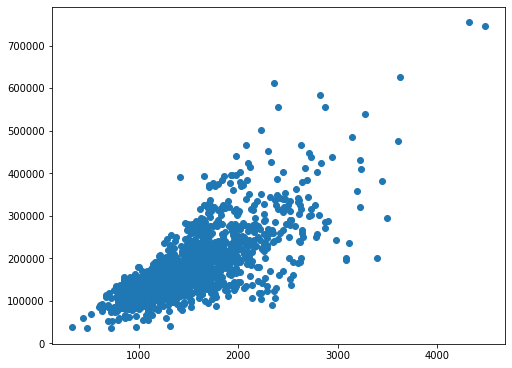

In [13]:
# Seeing the relationship between GrLivArea and SalePrice after removing outliers
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.scatter(df_temp['GrLivArea'], df_temp['SalePrice']);

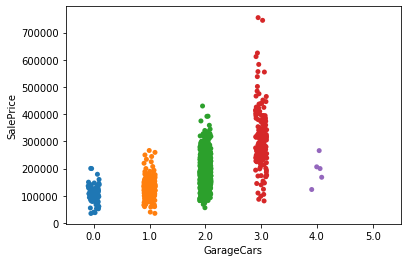

In [14]:
# Seeing the relationship between GarageCars and SalePrice
sns.stripplot(df_temp['GarageCars'], df_temp['SalePrice']);

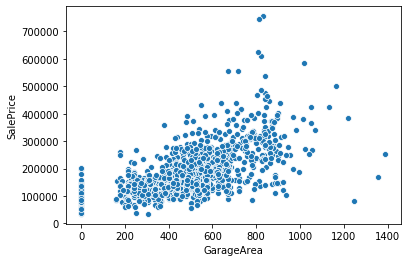

In [15]:
# Seeing the relationship between GarageArea and SalePrice
sns.scatterplot(df_temp['GarageArea'], df_temp['SalePrice']);

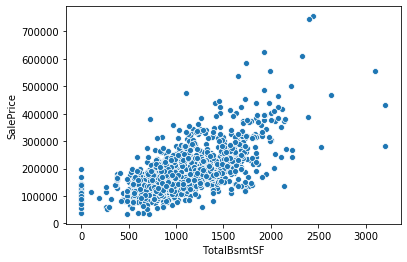

In [16]:
# Seeing the relationship between TotalBsmtSF and SalePrice
sns.scatterplot(df_temp['TotalBsmtSF'], df_temp['SalePrice']);

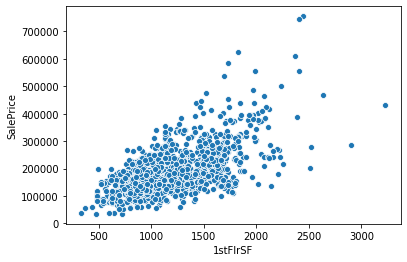

In [17]:
# Seeing the relationship between 1stFlrSF and SalePrice
sns.scatterplot(df_temp['1stFlrSF'], df_temp['SalePrice']);

## Resetting the data

Since we have made changes to the original data while doing our EDA (Exploratory Data Analysis), we need to change back to the original data to carry on with feature engineering.

In [18]:
df_temp.reset_index(drop=True)
df_temp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


## Checking and filling for missing data

In [19]:
# Checking which features of the data are missing data
for feature, data in df_temp.items():
    if pd.isnull(data).sum():
        print(feature)

MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Electrical
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType
SalePrice


In [20]:
# Making a DataFrame of the total number of missing data and the percentages
missing_total = df_temp.isna().sum().sort_values(ascending=False)
missing_percent = ((df_temp.isna().sum() / 2917) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Total Number of Missing Samples', 'Percentage of Missing Samples'])
missing_data.head(40)

,Total Number of Missing Samples,Percentage of Missing Samples
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
SalePrice,1459,50.017141
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageCond,159,5.450806
GarageYrBlt,159,5.450806
GarageQual,159,5.450806


In [21]:
df_temp.isna().count()

MSSubClass       2917
MSZoning         2917
LotFrontage      2917
LotArea          2917
Street           2917
                 ... 
MoSold           2917
YrSold           2917
SaleType         2917
SaleCondition    2917
SalePrice        2917
Length: 80, dtype: int64

In [22]:
data_cat = df_temp.select_dtypes('object')
data_num = df_temp.select_dtypes(['int64', 'float64'])

In [23]:
d1 = data_cat.isna().sum().sort_values(ascending=False)
d1.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning',
       'Functional', 'Utilities', 'Electrical', 'KitchenQual', 'SaleType',
       'Exterior2nd', 'Exterior1st', 'Heating', 'Condition1', 'Street',
       'PavedDrive', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'RoofStyle', 'Condition2', 'BldgType', 'HouseStyle',
       'HeatingQC', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'CentralAir', 'SaleCondition'],
      dtype='object')

In [24]:
# Splitting the missing string columns into 1. filling NaN values with 'None' 2. filling by category
columns1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
            'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure',
            'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
columns2 = ['MSZoning', 'Functional', 'Utilities', 'Electrical', 'KitchenQual', 'SaleType', 'Electrical', 'Exterior1st', 'Exterior2nd']

In [25]:
for feature in columns1:
    data_cat[feature].fillna('None', inplace=True)

In [26]:
for feature in columns2:
    data_cat[feature].fillna(data_cat[feature].mode()[0], inplace=True)

In [27]:
d2 = data_num.isna().sum().sort_values(ascending=False)
d2.index

Index(['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtFinSF1', 'GarageCars', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'OverallCond',
       'GrLivArea', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'LotArea', 'FullBath', 'YrSold', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'MSSubClass'],
      dtype='object')

In [28]:
columns3 = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
            'BsmtFullBath', 'BsmtFinSF1', 'GarageCars', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'GarageArea']

In [29]:
for feature in columns3:
    data_num[feature].fillna(0, inplace=True)

In [30]:
filled_data = pd.concat([data_cat, data_num], axis=1)
filled_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,2,2008,208500.0
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,5,2007,181500.0
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,9,2008,223500.0
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,2,2006,140000.0
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,NaN
2915,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,NaN
2916,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,NaN
2917,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,NaN


In [31]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2917 non-null   object 
 1   Street         2917 non-null   object 
 2   Alley          2917 non-null   object 
 3   LotShape       2917 non-null   object 
 4   LandContour    2917 non-null   object 
 5   Utilities      2917 non-null   object 
 6   LotConfig      2917 non-null   object 
 7   LandSlope      2917 non-null   object 
 8   Neighborhood   2917 non-null   object 
 9   Condition1     2917 non-null   object 
 10  Condition2     2917 non-null   object 
 11  BldgType       2917 non-null   object 
 12  HouseStyle     2917 non-null   object 
 13  RoofStyle      2917 non-null   object 
 14  RoofMatl       2917 non-null   object 
 15  Exterior1st    2917 non-null   object 
 16  Exterior2nd    2917 non-null   object 
 17  MasVnrType     2917 non-null   object 
 18  ExterQua

In [32]:
filled_data['MSSubClass'] = filled_data['MSSubClass'].astype('category').cat.as_ordered()

In [33]:
columns = data_num.columns

for col in columns:
    print(data_num[col].value_counts())
    print('\n')

20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64


0.0      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
141.0      1
136.0      1
28.0       1
126.0      1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64


9600     44
7200     43
6000     34
9000     29
10800    25
         ..
2628      1
8775      1
13478     1
13587     1
12292     1
Name: LotArea, Length: 1949, dtype: int64


5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     29
2      13
1       4
Name: OverallQual, dtype: int64


5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64


2005    142
2006    138
2007    108
2004     99
2003     88
       ... 
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Le

In [34]:
columns_to_cat = ['YrSold', 'MoSold']

In [35]:
columns_to_cat

['YrSold', 'MoSold']

In [36]:
for feature, data in filled_data.items():
    if feature in columns_to_cat:
        filled_data[feature] = data.astype('str')

In [37]:
filled_data.isna().sum()

MSZoning          0
Street            0
Alley             0
LotShape          0
LandContour       0
               ... 
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice      1459
Length: 80, dtype: int64

In [38]:
filled_data.reset_index(drop=True)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,2,2008,208500.0
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,5,2007,181500.0
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,9,2008,223500.0
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,2,2006,140000.0
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,NaN
2913,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,NaN
2914,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,NaN
2915,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,NaN


In [39]:
filled_data.drop('SalePrice', axis=1, inplace=True)

## Splitting the data back into train and test sets

In [40]:
final_features = pd.get_dummies(filled_data).reset_index(drop=True)
final_features

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,1,0,0,0,0,0,1,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,1,0,0,0,1,0,0,0,0
2913,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,1,0,0,0,0
2914,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
2915,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,1,0,0,1,0,0,0,0


In [41]:
train.shape

(1460, 81)

In [42]:
row_num = train.shape[0]

X_trainval = final_features[:row_num]
X_test = final_features[row_num:]
y_trainval = train['SalePrice']

In [59]:
np.random.seed(50)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)

In [60]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 331), (292, 331), (1168,), (292,))

## Building an evaluation function

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {'Training R^2': model.score(X_train, y_train),
              'Valid R^2': model.score(X_val, y_val),
              'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_val, val_preds),
              'Training RMSE': rmse(y_train, train_preds),
              'Valid RMSE': rmse(y_val, val_preds)}
    return scores

## Building a machine learning model

In [64]:
np.random.seed(50)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
show_scores(model)

{'Training R^2': 0.8587206114155244,
 'Valid R^2': 0.07089185039479362,
 'Training MAE': 20912.36970890411,
 'Valid MAE': 58568.73506849315,
 'Training RMSE': 29730.76262219771,
 'Valid RMSE': 77755.2293186642}